# Roster Age/Expererience Year over Year
- Create an adaptable book to plot team's proportions of each class rank (FR, SO, ect) from year to year for the past 10-20 years
- Using a stacked bar chart will make for a nice look I thin

In [139]:
## Depen# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import seaborn as sns
import sqlite3


## Hotfix TURNED OFF - replace master_roster table in dB with corrected roster table from csv

In [140]:
# # Load Corrected Roster Data
# roster_path = os.path.join('..', 'data', 'rosters', 'master_roster.csv')

# # load as DF
# corrected_roster = pd.read_csv(roster_path)

# # Check
# corrected_roster.head()

In [141]:

# #### EXTRACT FROM DATABASE
# # Connect to the database
# db_path = os.path.join('..', 'TEMP', 'roster_cleaned.db')
# conn = sqlite3.connect(db_path)

# # Query the database
# roster = pd.read_sql_query("SELECT * FROM master_roster", conn)

# # roster.head()


In [142]:
# # replace the master_roster db table with the corrected_roster
# corrected_roster.to_sql('master_roster', conn, if_exists='replace', index=False)


In [143]:
breakpoint()

## Load Roster Data

In [144]:

# Load DATABASE

#### EXTRACT FROM DATABASE
# Connect to the database
db_path = os.path.join('..', 'data', 'db', 'Cleaned_DB_Ap_8.db')
conn = sqlite3.connect(db_path)

# Query the database
roster = pd.read_sql_query("SELECT * FROM master_roster", conn)

# Close the connection
conn.close()

# Check the table
roster.head()

# TEMP
############################################
# Drop last 3 columns
# roster = roster.iloc[:, :-3]
# Drop file and Ht
roster = roster.drop(columns=['file', 'Ht'])
#################################################

# Replace - with ' ' in team column
roster['Team'] = roster['Team'].str.replace('-', ' ')
# Change 'Clean_Name' to 'Player'
roster = roster.rename(columns={'Clean_Name': 'Player'})
# Draft_Year, D_Round, Wt, Season to int if needed
int_col = ['Draft_Year', 'D_Round', 'Wt', 'Season']
roster[int_col] = roster[int_col].fillna(0) # Fill nulls
roster[int_col] = roster[int_col].astype(int) # convert to int
#############################################
# Drop any duplicate rows
# Print length before
print(f'Length before dropping duplicates: {len(roster)}')
roster = roster.drop_duplicates()
# Print length after
print(f'Length after dropping duplicates: {len(roster)}')

roster.head() # Check table

#####################################################
# ### OPEN THE ROSTER FROM A CSV FILE
# roster_path = os.path.join('..', 'data', 'rosters', 'all_time_combined_roster.csv')

# # Check if the file exists
# if os.path.exists(roster_path):
#     # Read the csv file
#     roster = pd.read_csv(roster_path)
# else:
#     print('Roster filepath does not exist')
#     sys.exit(1)


### QUICK CLEANING
#### Check the column name and rename if necessary
## If Clean_Name exists rename it to Player
# if 'Clean_Name' in roster.columns:
#     roster = roster.rename(columns={'Clean_Name': 'Player'})

# # Season = int
# roster['Season'] = roster['Season'].astype(int)


# # drop the file column seems to be a mistake
# if 'file' in roster.columns:
#     roster = roster.drop(columns=['file'])
    
# # Check and drop duplicate rows
# roster = roster.drop_duplicates()

Length before dropping duplicates: 86500
Length after dropping duplicates: 83298


,Team,Player,No,Position,Yr,Wt,DOB,Hometown,Height_Inches,Draft_Year,NHL_Team,D_Round,Last Team,League,Season,captain
0,Brown,Eliot Scudder,0,Forwards,None,0,11/1/1882,"Brockton, Mass.",0,0,None,0,None,None,1902,None
1,Brown,Horatio Otis,0,Forwards,Jr,0,11/29/1883,"Providence, R.I.",0,0,None,0,None,None,1902,None
2,Harvard,Daniel Newhall,0,Defensemen,Fr,0,12/3/1884,"Philadelphia, Pa.",0,0,None,0,None,None,1902,None
3,Harvard,John Manning,0,Goaltenders,Jr,0,6/3/1879,"Boston, Mass.",0,0,None,0,None,None,1902,None
4,Harvard,Joseph Lovering,0,Defensemen,None,0,1/7/1882,"Boston, Mass.",0,0,None,0,None,None,1902,None


## Setup and Plot Parameters

In [145]:


## Load The Exo 2 font in case of problems with the font
font_path = 'C:/Windows/Fonts/Exo 2.tff'
# plt.rcParams['font.family'] = 'Exo 2'




## Set Filters


In [146]:
########################
### SET FILTERS 
## YEARS
start_year = 2000
end_year = 2024
#####################

team = 'Michigan State'


### Range of Years

In [147]:

# Filter the dataset to the years of interest
roster = roster[(roster['Season'] >= start_year) 
                & (roster['Season'] <= end_year)]




print(f'{len(roster["Team"].unique()) } unique teams in the dataset')

# Average players per team each season
pp_team = len(roster) / len(roster['Team'].unique())
# Find average per year
range = end_year - start_year
pp_team_year = pp_team / range
print(f'Average players per team each season: {pp_team_year}\n\n\n')

### Cache roster of all teams for the given time period
roster_by_year = roster.copy()

# # roster Info
# roster.info()

# roster.head()

################# VIZULIZE THE DATA
# # Histogram of player count per team and year
# plt.figure(figsize=(12, 6))
# sns.histplot(data=roster, x='Team', hue='Season', multiple='stack', palette='viridis')
##############################################

# Team value counts
team_counts = roster['Team'].value_counts()
# team_counts

# # Plot the team counts
# plt.figure(figsize=(12, 6))
# sns.barplot(x=team_counts.index, y=team_counts.values, palette='viridis')

67 unique teams in the dataset
Average players per team each season: 23.600124378109452





### TEAM OR LIST OF TEAMS

In [148]:
#### SET TEAM OR GROUP OF TEAMS
# team = 'Michigan State'
# Filter the dataset to the team of interest
team_roster = roster[roster['Team'] == team]

# How many NHL Draft Picks has season team had 
# group by Season and Count the number of players where Draft_Year is not 0
team_roster.groupby('Season')['Draft_Year'].apply(lambda x: (x != 0).sum())

# sort accending by season
team_roster.groupby('Season')['Draft_Year'].apply(lambda x: (x != 0).sum()).sort_index()
# team_roster['Draft_Year'].value_counts().sort_index()



Season
2000    0
2001    0
2002    3
2003    4
2004    5
2005    9
2006    7
2007    8
2008    7
2009    7
2010    4
2011    3
2012    4
2013    5
2014    6
2015    5
2016    2
2017    0
2018    3
2019    4
2020    5
2021    5
2022    3
2023    5
Name: Draft_Year, dtype: int64

## Break down each roster by age and class rank

In [149]:
## claculate the average age to start the season October 1st of Season
# Convert the DOB to datetime
# If DOB is not in an appro datetime format drop the row
team_roster['DOB'] = pd.to_datetime(team_roster['DOB'], errors='coerce')
# team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])
# Calculate Player Age in Years at the start of the season (Oct 1, Season), store as float of years
team_roster['Age'] = (team_roster['Season'] + 1) - team_roster['DOB'].dt.year



# team_roster.tail()
# GroupBy Season and Calculate the average age of each team each year and save as a dataframe
team_avg_age = team_roster.groupby('Season')['Age'].mean().reset_index()
# team_avg_age.head(40)

# Get a player count by season
# player_count = team_roster.groupby('Season')['Player'].count().reset_index()
# player_count.head(20)



C:\Users\jbanc\AppData\Local\Temp\ipykernel_20496\970684823.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_roster['DOB'] = pd.to_datetime(team_roster['DOB'], errors='coerce')
C:\Users\jbanc\AppData\Local\Temp\ipykernel_20496\970684823.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_roster['Age'] = (team_roster['Season'] + 1) - team_roster['DOB'].dt.year


In [150]:
team_roster.head()
team_avg_age.head(10)

,Season,Age
0,2000,21.440000
1,2001,21.481481
2,2002,21.560000
3,2003,21.600000
4,2004,21.857143
5,2005,21.571429
6,2006,21.777778
7,2007,21.538462
8,2008,21.692308
9,2009,21.571429


In [151]:
# Get a count of each class rank by season
# Group by Season, count the number of players in each class rank, and save as a dataframe
class_rank_count = team_roster.groupby('Season')['Yr'].value_counts().unstack().reset_index()
# Calculate the total number of players row each row . add the total column addign the Fr, So, Jr, Sr, Gr columns
class_rank_count['Total'] = class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr']].sum(axis=1)
# Add the Team column back
class_rank_count['Team'] = team_roster['Team'].unique()[0]




# Reorder the columns
class_rank_count = class_rank_count[['Season', 'Team', 'Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']]
# Convert the columns to int (0 for Nan)
class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']] = class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']].fillna(0).astype(int)

## Add the average age to the class_rank_count
class_rank_count = class_rank_count.merge(team_avg_age, on='Season', how='left')


# Calculate the percentage of each class rank
class_rank_count['Fr%'] = class_rank_count['Fr'] / class_rank_count['Total']
class_rank_count['So%'] = class_rank_count['So'] / class_rank_count['Total']
class_rank_count['Jr%'] = class_rank_count['Jr'] / class_rank_count['Total']
class_rank_count['Sr%'] = class_rank_count['Sr'] / class_rank_count['Total']
class_rank_count['Gr%'] = class_rank_count['Gr'] / class_rank_count['Total']

# class_rank_count.tail(20)

In [152]:
# roster.head()

In [153]:
# Create the same type of dataframe for the entire dataset

## claculate the average age to start the season October 1st of Season for entire dataset
# Convert the DOB to datetime
# If DOB is not in an appro datetime format drop the row
roster['DOB'] = pd.to_datetime(roster['DOB'], errors='coerce')
# team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])
# Calculate Player Age in Years at the start of the season (Oct 1, Season), store as float of years
roster['Age'] = (roster['Season'] + 1) - roster['DOB'].dt.year







# Get a count of each class rank by season

# Group by Season and Team, count the number of players in each class rank, and save as a dataframe
all_all_class_rank_count = roster.groupby(['Season', 'Team'])['Yr'].value_counts().unstack().reset_index()
# Calculate the total number of players row each row . add the total column addign the Fr, So, Jr, Sr, Gr columns
all_all_class_rank_count['Total'] = all_all_class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr']].sum(axis=1)

# Calulate the average age for each team each season
all_avg_age = roster.groupby(['Season', 'Team'])['Age'].mean().reset_index()



# Reorder the columns
all_all_class_rank_count = all_all_class_rank_count[['Season', 'Team', 'Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']]
# Convert the columns to int (0 for Nan)
all_all_class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']] = all_all_class_rank_count[['Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']].fillna(0).astype(int)
# Calculate the percentage of each class rank
all_all_class_rank_count['Fr%'] = all_all_class_rank_count['Fr'] / all_all_class_rank_count['Total']
all_all_class_rank_count['So%'] = all_all_class_rank_count['So'] / all_all_class_rank_count['Total']
all_all_class_rank_count['Jr%'] = all_all_class_rank_count['Jr'] / all_all_class_rank_count['Total']
all_all_class_rank_count['Sr%'] = all_all_class_rank_count['Sr'] / all_all_class_rank_count['Total']
all_all_class_rank_count['Gr%'] = all_all_class_rank_count['Gr'] / all_all_class_rank_count['Total']


## Add the average age to the class_rank_count
all_all_class_rank_count = all_all_class_rank_count.merge(all_avg_age, on=['Season', 'Team'], how='left')

all_all_class_rank_count.tail()



,Season,Team,Fr,So,Jr,Sr,Gr,Total,Fr%,So%,Jr%,Sr%,Gr%,Age
1386,2023,Union,6,9,6,6,1,28,0.214286,0.321429,0.214286,0.214286,0.035714,23.142857
1387,2023,Vermont,10,8,6,3,3,30,0.333333,0.266667,0.200000,0.100000,0.100000,22.566667
1388,2023,Western Michigan,8,3,2,12,5,30,0.266667,0.100000,0.066667,0.400000,0.166667,23.200000
1389,2023,Wisconsin,8,5,4,7,3,27,0.296296,0.185185,0.148148,0.259259,0.111111,21.851852
1390,2023,Yale,7,7,6,8,0,28,0.250000,0.250000,0.214286,0.285714,0.000000,22.678571


## Create the dataframe for all schools
- will be used to plot the backfround data if needed

In [154]:
### PROBABLY REDUNDANT WITH THE CHANGES ABOVE

# # roster_by_year

# # Convert the DOB to datetime
# # If DOB is not in an appro datetime format drop the row
# roster_by_year['DOB'] = pd.to_datetime(roster_by_year['DOB'], errors='coerce')
# # team_roster['DOB'] = pd.to_datetime(team_roster['DOB'])

# # Create date for the start of the season 
# roster_by_year['Season_Start'] = pd.to_datetime(roster_by_year['Season'].astype(str) + '-10-01')
# # Calculate the age of the player at the start of the season
# roster_by_year['Age'] = roster_by_year['Season_Start'] - roster_by_year['DOB']
# # Display the age in years
# roster_by_year['Age'] = roster_by_year['Age'].dt.days / 365.25

# roster_by_year.tail()
# # GroupBy Team and Season and Calculate the average age of each team each year and save as a dataframe
# all_team_avg_age = roster_by_year.groupby(['Team', 'Season'])['Age'].mean().reset_index()

# all_team_avg_age.head(40)
# # len(all_team_avg_age['Team'].unique())
# # len(all_team_avg_age)


<Axes: xlabel='Season', ylabel='Age'>

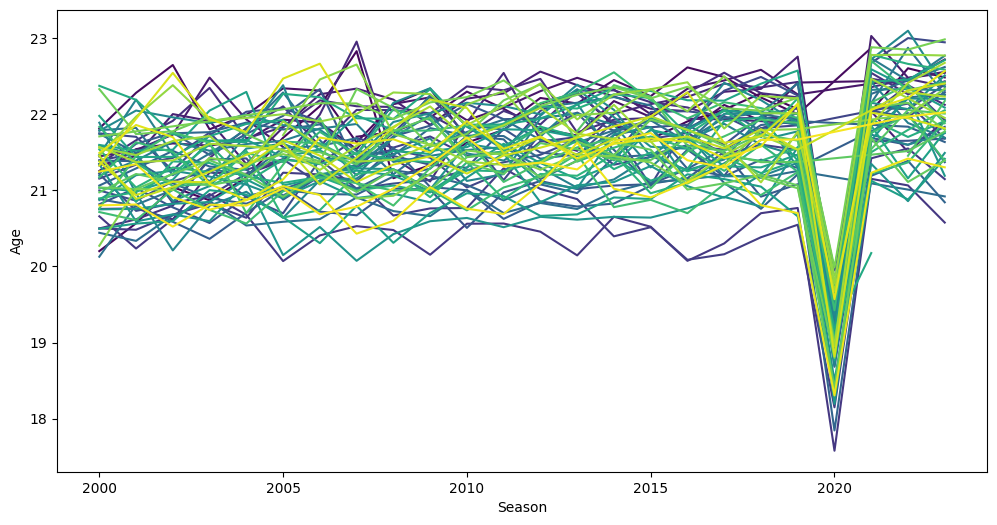

In [155]:
# Plot the all_team average age with no legend
# Drop outliers, anything below 17
all_team_avg_age = all_team_avg_age[all_team_avg_age['Age'] > 17]
plt.figure(figsize=(12, 6))
sns.lineplot(data=all_team_avg_age, x='Season', y='Age', hue='Team', palette='viridis', legend=False)

## Create a plot of Class rank by year for a single team

### Code

In [156]:
# Merge the class_rank_count with the team_avg_age
class_rank_count = class_rank_count.merge(team_avg_age, on='Season', how='outer')

class_rank_count.head(20)



,Season,Team,Fr,So,Jr,Sr,Gr,Total,Age_x,Fr%,So%,Jr%,Sr%,Gr%,Age_y
0,2000,Michigan State,5,10,5,5,0,25,21.440000,0.200000,0.400000,0.200000,0.200000,0.0,21.440000
1,2001,Michigan State,9,5,8,5,0,27,21.481481,0.333333,0.185185,0.296296,0.185185,0.0,21.481481
2,2002,Michigan State,8,8,3,6,0,25,21.560000,0.320000,0.320000,0.120000,0.240000,0.0,21.560000
3,2003,Michigan State,9,5,9,2,0,25,21.600000,0.360000,0.200000,0.360000,0.080000,0.0,21.600000
4,2004,Michigan State,7,9,5,7,0,28,21.857143,0.250000,0.321429,0.178571,0.250000,0.0,21.857143
5,2005,Michigan State,9,7,7,5,0,28,21.571429,0.321429,0.250000,0.250000,0.178571,0.0,21.571429
6,2006,Michigan State,5,10,7,5,0,27,21.777778,0.185185,0.370370,0.259259,0.185185,0.0,21.777778
7,2007,Michigan State,6,5,9,6,0,26,21.538462,0.230769,0.192308,0.346154,0.230769,0.0,21.538462
8,2008,Michigan State,9,6,4,9,0,28,21.692308,0.321429,0.214286,0.142857,0.321429,0.0,21.692308
9,2009,Michigan State,9,9,6,4,0,28,21.571429,0.321429,0.321429,0.214286,0.142857,0.0,21.571429


C:\Users\jbanc\AppData\Local\Temp\ipykernel_20496\2931788579.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('Set3')


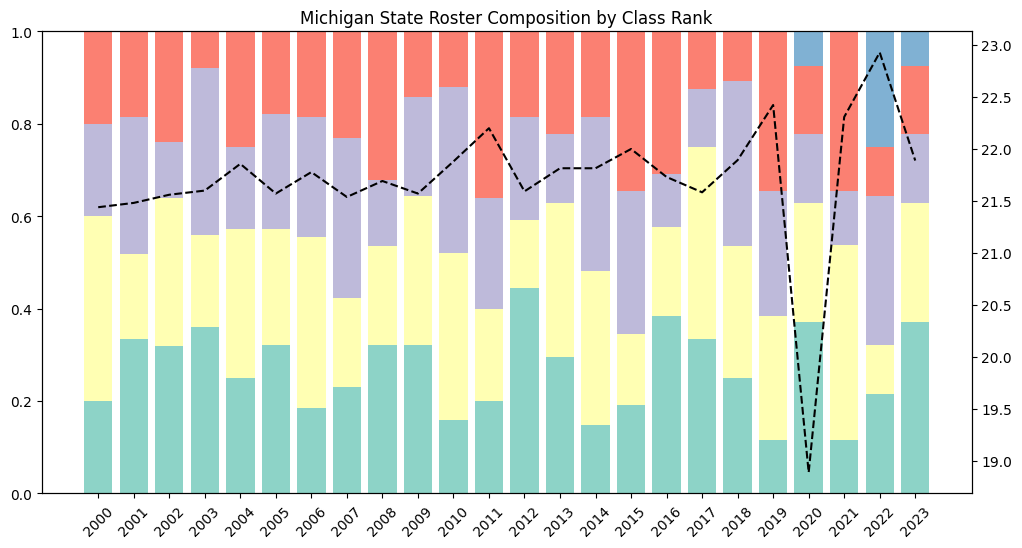

In [157]:
#### MATPLOT LIB
plt.figure(figsize=(12, 6))

# Merge the class_rank_count with the team_avg_age
class_rank_count = class_rank_count.merge(team_avg_age, on='Season', how='left')


# Plot the proportion of each class rank by season in a stacked bar plot

# Add the average age line plot
# plt.plot(class_rank_count['Season'], class_rank_count['Age'], color='black', label='Average Age', linestyle='--')

colormap = plt.cm.get_cmap('Set3')

# Create the stacked par chart using the Fr%, So%, Jr%, Sr%, Gr% columns
plt.bar(class_rank_count['Season'], class_rank_count['Fr%'], color=colormap(0), label='Fr')
plt.bar(class_rank_count['Season'], class_rank_count['So%'], bottom=class_rank_count['Fr%'], color=colormap(1), label='So')
plt.bar(class_rank_count['Season'], class_rank_count['Jr%'], bottom=class_rank_count['Fr%'] + class_rank_count['So%'], color=colormap(2), label='Jr')
plt.bar(class_rank_count['Season'], class_rank_count['Sr%'], bottom=class_rank_count['Fr%'] + class_rank_count['So%'] + class_rank_count['Jr%'], color=colormap(3), label='Sr')
plt.bar(class_rank_count['Season'], class_rank_count['Gr%'], bottom=class_rank_count['Fr%'] + class_rank_count['So%'] + class_rank_count['Jr%'] + class_rank_count['Sr%'], color=colormap(4), label='Gr')





# Add the team name to the plot
plt.title(f'{team} Roster Composition by Class Rank')

# Label every year on the x-axis
plt.xticks(class_rank_count['Season'], rotation=45)

# add the average age as a line plot on the same graph, independent y-axis
plt.twinx()
plt.plot(class_rank_count['Season'], class_rank_count['Age'], color='black', label='Average Age', linestyle='--')

# # Add the count of total players each year the top xaxis
# plt.twinx()
# plt.plot(class_rank_count['Season'], class_rank_count['Total'], color='red', label='Total Players', linestyle='--')












In [158]:
all_team_class_rank.head()
class_rank_count.head()

NameError: name 'all_team_class_rank' is not defined

In [ ]:
# Create a Plot that is a stacked bar chart of the average class rank for all teams that season

# Merge the all time class rank with the team_avg_age
all_team_class_rank = all_team_class_rank.merge(all_team_avg_age, on='Season', how='outer')

# Group by Season and Yr and calculate t

NameError: name 'all_team_class_rank' is not defined

KeyError: 'Age'

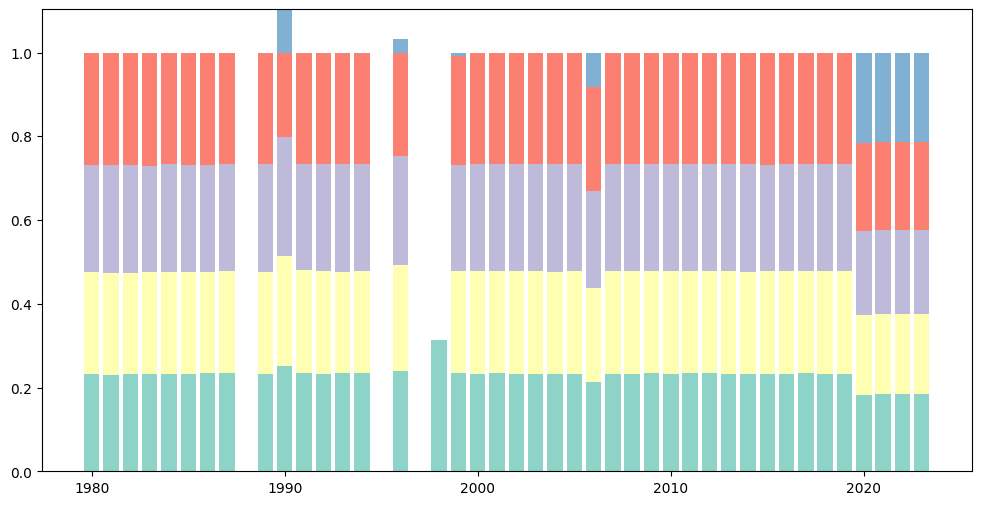

In [ ]:
# he average of each class rank
all_team_class_rank = roster_by_year.groupby(['Season', 'Yr'])['Age'].mean().unstack().reset_index()
# Add the Team column back
# all_team_class_rank['Team'] = 'All Teams'

# Calculate the total number of players row each row . add the total column addign the Fr, So, Jr, Sr, Gr columns
all_team_class_rank['Total'] = all_team_class_rank[['Fr', 'So', 'Jr', 'Sr', 'Gr']].sum(axis=1)

# Reorder the columns
all_team_class_rank = all_team_class_rank[['Season', 'Fr', 'So', 'Jr', 'Sr', 'Gr', 'Total']]

# Calculate the percentage of each class rank
all_team_class_rank['Fr%'] = all_team_class_rank['Fr'] / all_team_class_rank['Total']
all_team_class_rank['So%'] = all_team_class_rank['So'] / all_team_class_rank['Total']
all_team_class_rank['Jr%'] = all_team_class_rank['Jr'] / all_team_class_rank['Total']
all_team_class_rank['Sr%'] = all_team_class_rank['Sr'] / all_team_class_rank['Total']
all_team_class_rank['Gr%'] = all_team_class_rank['Gr'] / all_team_class_rank['Total']

all_team_class_rank.head(20)

# Create the stacked bar plot
plt.figure(figsize=(12, 6))

# Plot the proportion of each class rank by season in a stacked bar plot
# Create the stacked par chart using the Fr%, So%, Jr%, Sr%, Gr% columns
plt.bar(all_team_class_rank['Season'], all_team_class_rank['Fr%'], color=colormap(0), label='Fr')
plt.bar(all_team_class_rank['Season'], all_team_class_rank['So%'], bottom=all_team_class_rank['Fr%'], color=colormap(1), label='So')
plt.bar(all_team_class_rank['Season'], all_team_class_rank['Jr%'], bottom=all_team_class_rank['Fr%'] + all_team_class_rank['So%'], color=colormap(2), label='Jr')
plt.bar(all_team_class_rank['Season'], all_team_class_rank['Sr%'], bottom=all_team_class_rank['Fr%'] + all_team_class_rank['So%'] + all_team_class_rank['Jr%'], color=colormap(3), label='Sr')
plt.bar(all_team_class_rank['Season'], all_team_class_rank['Gr%'], bottom=all_team_class_rank['Fr%'] + all_team_class_rank['So%'] + all_team_class_rank['Jr%'] + all_team_class_rank['Sr%'], color=colormap(4), label='Gr')

# Add the average age line plot
plt.plot(all_team_class_rank['Season'], all_team_class_rank['Age'], color='black', label='Average Age', linestyle='--')

# Add the team name to the plot
plt.title(f'All Teams Roster Composition by Class Rank')

# Label every year on the x-axis
plt.xticks(all_team_class_rank['Season'], rotation=45)

# Add the count of total players each year the top xaxis
plt.twinx()
plt.plot(all_team_class_rank['Season'], all_team_class_rank['Total'], color='red', label='Total Players', linestyle='--')



## Production By Class Rank - Total Point - % Pts

In [ ]:
## Calculate the amount of pointes each class rank is responsible for
# Draw on the player_stats_ytd table
# Load the player_stats_ytd table
player_stats_ytd = pd.read_sql_query("SELECT * FROM player_stats_ytd", conn)
# player_stats_ytd.head()

# Apply the same filters to the player_stats_ytd table

# Filter the dataset to the years of interest
player_stats_ytd = player_stats_ytd[(player_stats_ytd['Season'] >= start_year) 
                & (player_stats_ytd['Season'] <= end_year)]

# Filter the dataset to the team of interest
team_stats = player_stats_ytd[player_stats_ytd['Team'] == team]

# HOTFIX #
# Rename Clean_Player to Player if necessary
if 'Clean_Player' in team_stats.columns:
    team_stats = team_stats.rename(columns={'Clean_Player': 'Player'})

team_stats.head(40)

# Merge the Yr column from the roster table to the team_stats table bases on the Player column and Season
team_stats = team_stats.merge(roster[['Player', 'Season', 'Yr']], on=['Player', 'Season'], how='left')

# Fill any null values in the Yr column with 'NA'
team_stats['Yr'] = team_stats['Yr'].fillna('NA')

# Calculate the total points each class rank is responsible for
# Group by Season and Yr and sum the PTS column
class_rank_points = team_stats.groupby(['Season', 'Yr'])['Pts'].sum().unstack().reset_index()
# Fill any null values with 0
class_rank_points = class_rank_points.fillna(0)

# Calculate the percentage of points each class rank is responsible for
class_rank_points['Total'] = class_rank_points[['Fr', 'So', 'Jr', 'Sr', 'Gr']].sum(axis=1)
class_rank_points['Fr%'] = class_rank_points['Fr'] / class_rank_points['Total']
class_rank_points['So%'] = class_rank_points['So'] / class_rank_points['Total']
class_rank_points['Jr%'] = class_rank_points['Jr'] / class_rank_points['Total']
class_rank_points['Sr%'] = class_rank_points['Sr'] / class_rank_points['Total']
class_rank_points['Gr%'] = class_rank_points['Gr'] / class_rank_points['Total']

class_rank_points.head(40)

# Fill any null values with 0
# class_rank_points




## Percentage of Point by Each Class

- Problem with Pre 2010 Player Stat aggrigation tables